In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from operator import attrgetter
from matplotlib import colors as mcolors

In [2]:
#Открываем все файлы и сразу переводим все даты в формат datetime64 
df1 = pd.read_csv('olist_customers_dataset.csv')
df2 = pd.read_csv('olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])
df3 = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp',\
                                                     'order_approved_at',\
                                                     'order_delivered_carrier_date',\
                                                     'order_delivered_customer_date',\
                                                     'order_estimated_delivery_date'])

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [6]:
#Соединим все три таблицы в одну
data = df2.merge(df3, on='order_id', how='left').merge(df1, on='customer_id', how='left')
data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   customer_id                    112650 non-null  object        
 8   order_status                   112650 non-null  object        
 9   order_purchase_timestamp       112650 non-null  datetime64[ns]
 10  order_approved_at              112635 non-null  datetime64[ns]
 11  

In [8]:
#Извлекаем месяц из даты создания заказа (понадобится для дальнейшего анализа)
data ['order_period'] = data['order_purchase_timestamp'].dt.to_period('M')
data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02


## Задача 1: Оценить месячный retention в оформление заказа с помощью когортного анализа.

Для когортного анализа будем учитывать только доставленные заказы

In [9]:
df = data.query('order_status=="delivered"')
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02


In [10]:
#Извлекаем  день из даты создания заказа
df ['order_period_day'] = df['order_purchase_timestamp'].dt.to_period('D')
df.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period,order_period_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09,2017-09-13
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04,2017-04-26
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01,2018-01-14
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08,2018-08-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02,2017-02-04


In [11]:
#Присваиваем когорты на основе даты создания заказа для каждого пользователя
df ['cohort'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
df ['cohort_day'] = df.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')
df.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period,order_period_day,cohort,cohort_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09,2017-09-13,2017-09,2017-09-13
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04,2017-04-26,2017-04,2017-04-26
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01,2018-01-14,2018-01,2018-01-14
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08,2018-08-08,2018-08,2018-08-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02,2017-02-04,2017-02,2017-02-04


In [12]:
#Рассчитываем номер периода в днях (месячные периоды, деля на 30)
df['period_number_month'] = np.floor((df.order_period_day - df.cohort_day).apply(attrgetter('n'))/30)
df.head()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period,order_period_day,cohort,cohort_day,period_number_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09,2017-09-13,2017-09,2017-09-13,0.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04,2017-04-26,2017-04,2017-04-26,0.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01,2018-01-14,2018-01,2018-01-14,0.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08,2018-08-08,2018-08,2018-08-08,0.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02,2017-02-04,2017-02,2017-02-04,0.0


In [13]:
#Агрегируем данные по когортам и рассчитанному номеру периода
df_cohort = df.groupby(['cohort', 'period_number_month']).agg(n_customers=('customer_unique_id','nunique')).reset_index()
df_cohort.head()

,cohort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


In [14]:
#Создаем сводную таблицу для когортного анализа 
cohort_pivot = df_cohort.pivot_table(index='cohort', columns = 'period_number_month', values = 'n_customers')
cohort_pivot.fillna(0)

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10,262.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0
2016-12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01,717.0,2.0,0.0,4.0,1.0,1.0,2.0,2.0,0.0,0.0,...,4.0,3.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,0.0,0.0,0.0
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Рассчитываем размеры когорт (первый столбец сводной таблицы)
cohort_size = cohort_pivot.iloc[:,0]
cohort_size

cohort
2016-09       1.0
2016-10     262.0
2016-12       1.0
2017-01     717.0
2017-02    1628.0
2017-03    2503.0
2017-04    2256.0
2017-05    3451.0
2017-06    3037.0
2017-07    3752.0
2017-08    4057.0
2017-09    4004.0
2017-10    4328.0
2017-11    7060.0
2017-12    5338.0
2018-01    6842.0
2018-02    6288.0
2018-03    6774.0
2018-04    6582.0
2018-05    6506.0
2018-06    5878.0
2018-07    5949.0
2018-08    6144.0
Freq: M, Name: 0.0, dtype: float64

In [16]:
#Вычисляем коэффициенты удержания, деля на размер когорты
retention_matrix = cohort_pivot.divide(cohort_size, axis =0)
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Вычисляем медианный retention 1-го месяца
CR_retention = retention_matrix[1.0].median().round(4)#Стоим тепловую карту когортного анализа

In [18]:
#Найти когорту с самым высоким retention на 3-й месяц
print(f" Когорота {retention_matrix[3].idxmax()} с самым выскоим retention {retention_matrix[3].max().round(4)}")

 Когорота 2017-01 с самым выскоим retention 0.0056


## Задача 2: Определить, существует ли product/market fit у маркетплейса

Если посмотреть на когортного анализ из предыдущей задачи, то можно увидеть, что у маркетплейса почти нулевой retention. Что означает отсутствие product/market fit. Масштабировать подобный продукт на новые рынки нельзя. Если посмотреть на размеры когорт (cohor_size), то можно увидеть, что маркетплейс привлекает много новых клиентов. Значит, сосредоточиться нужно не на привлечении клиентов, а на их удержании. Для этого сначала нужно разобраться почему клиенты уходят.

## Задача 3: Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.

Первая метрика должна отражать рост объёма продаж маркетплейса.

Profit — прибыль.

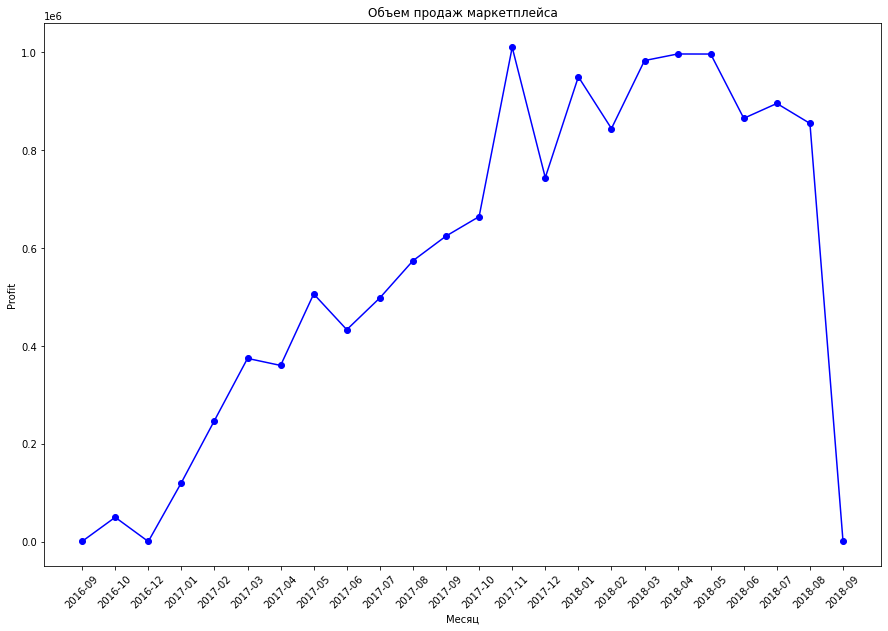

In [19]:
#Рассчитаем первую метрику и построим линейный график, чтобы проследить изменения метрики во времени 
Profit = data.groupby(['order_period']).agg({'price': 'sum'}).reset_index()
plt.figure(figsize=(15, 10))
plt.plot(Profit['order_period'].astype(str), Profit['price'], marker='o', color='blue')

plt.title('Объем продаж маркетплейса')
plt.xlabel('Месяц')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()



Вторая — показывать объем аудитории, которой продукт доставляет ценность.

MAU (Monthly Active Users) - показывает количество уникальных пользователей за месяц без учёта повторных сессий.

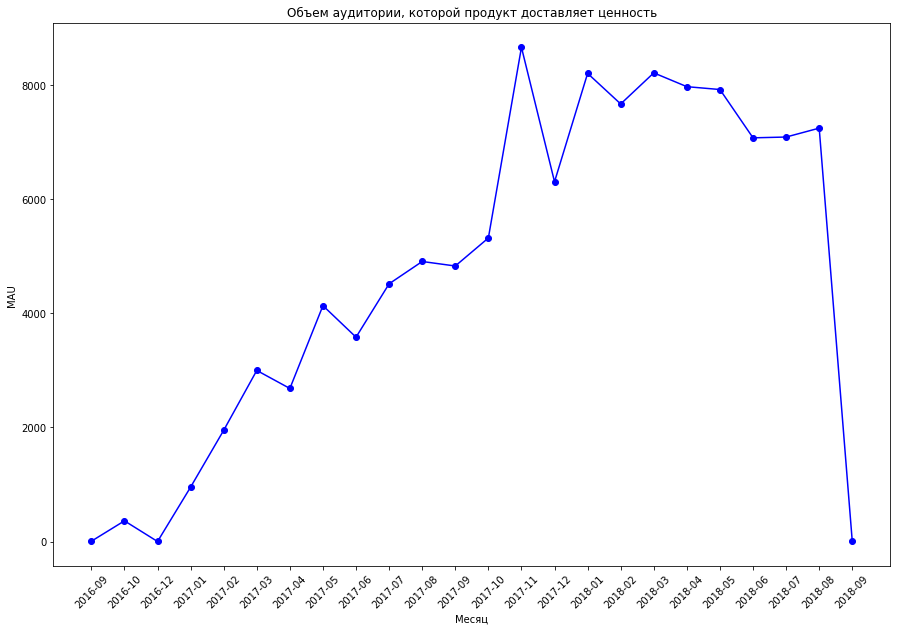

In [20]:
#Рассчитаем вторую метрику и построим линейный график, чтобы проследить изменения метрики во времени 
MAU = data.groupby(['order_period']).agg({'customer_unique_id': 'count'}).reset_index()

plt.figure(figsize=(15, 10))
plt.plot(MAU['order_period'].astype(str), MAU['customer_unique_id'], marker='o', color='blue')

plt.title('Объем аудитории, которой продукт доставляет ценность')
plt.xlabel('Месяц')
plt.ylabel('MAU')
plt.xticks(rotation=45)
plt.show()

Третья — отражать заинтересованность новых клиентов в продакте.

ER - показывает, какая доля новых клиентов совершила повторную покупку, что покажет их заинтересованность в продукте.

In [21]:
repeat_orders = data.groupby('customer_unique_id').nunique().query('order_id>1').shape[0]
ER = len (data['customer_unique_id'])/repeat_orders
ER

38.67147270854789

Четвёртая — отражать вовлеченность клиента в продолжение использования продукта.

Retention — это маркетинговая метрика, которая показывает, сколько клиентов продолжают пользоваться продуктом, услугой или платформой через определённый период с момента первого взаимодействия. 

Для ее визуализации построим Retention matrix - это визуальное представление, которое объединяет временные и поведенческие данные для анализа удержания клиентов.

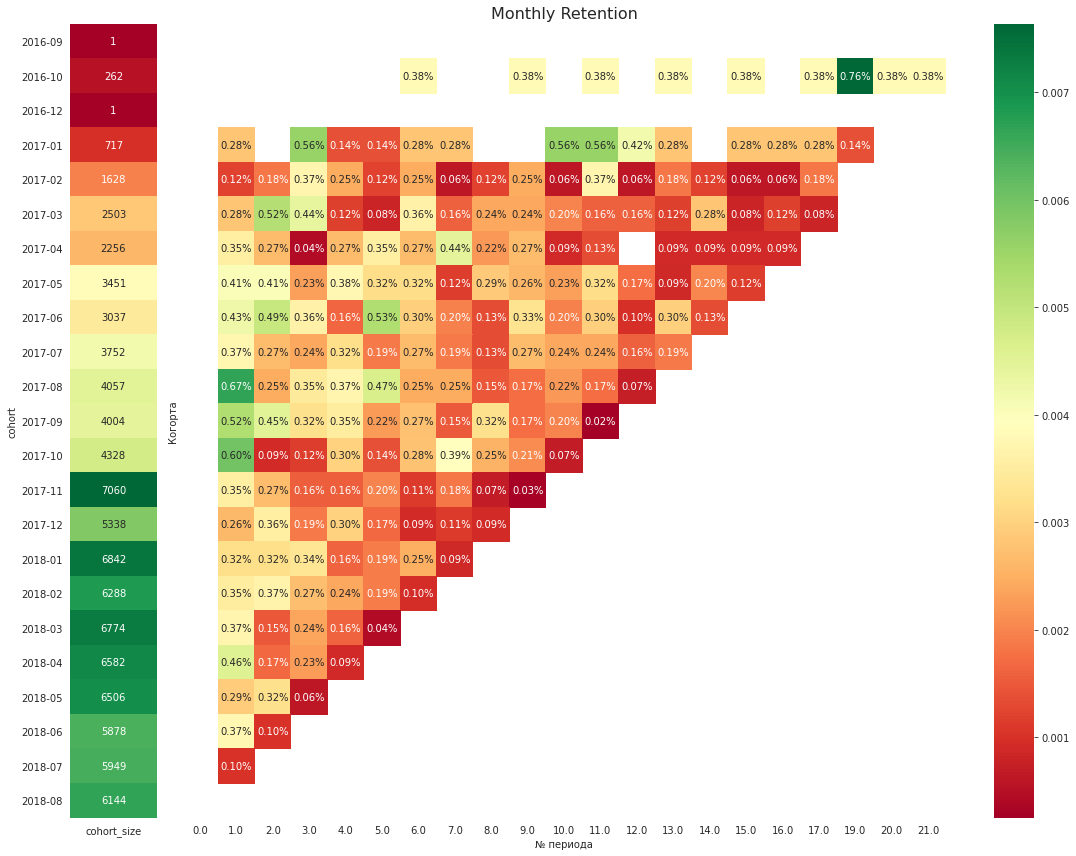

In [22]:
with sns.axes_style("white"):
    fig, ax=plt.subplots(1,2, figsize=(16,12),sharey=True, gridspec_kw={'width_ratios':[1,11]})
    #Тепловая карта для коээфициентов удержания
    sns.heatmap(retention_matrix,
               mask=retention_matrix.isin([None, 1]),
               annot=True,
               fmt='.2%',
               cmap='RdYlGn',
               ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')
    #Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0:'cohort_size'})
    white_cmap=mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
               annot=True,
               cbar= False,
               fmt='g',
               cmap='RdYlGn',
               ax=ax[0])
    fig.tight_layout()
    plt.show()

Пятая — отражать денежное выражение вовлеченности клиента.

ARPPU (Average Revenue Per Paying User) — это метрика, которая рассчитывает средний доход на платящего пользователя

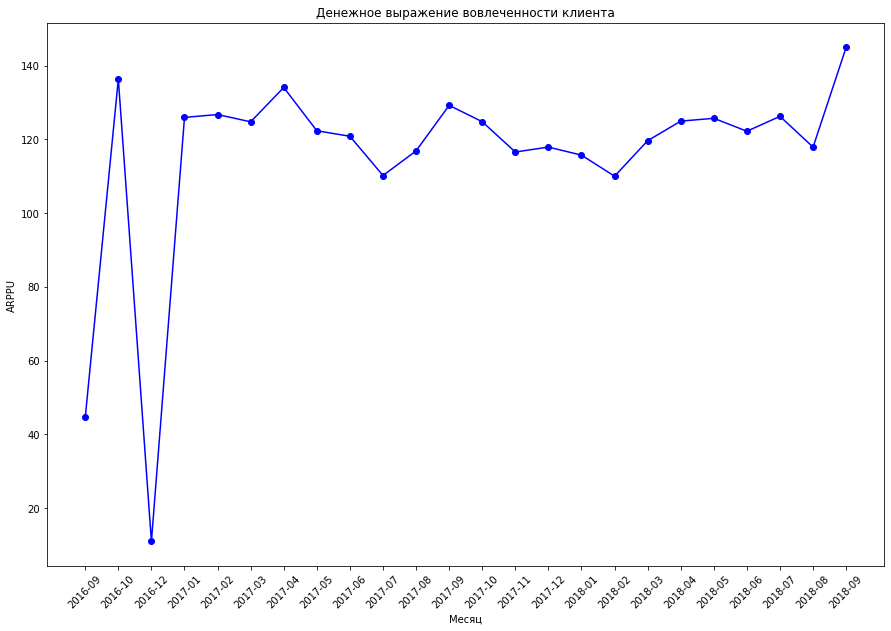

In [23]:
#Рассчитаем пятую метрику и построим линейный график, чтобы проследить изменения метрики во времени 

ARPPU = data.groupby(['order_period']).agg({'price': 'sum', 'customer_unique_id':'count'}).reset_index()
ARPPU ['ARPPU'] = ARPPU['price']/ARPPU['customer_unique_id']
ARPPU ['ARPPU'] = ARPPU ['ARPPU'].round(2)

plt.figure(figsize=(15, 10))
plt.plot(MAU['order_period'].astype(str), ARPPU['ARPPU'], marker='o', color='blue')

plt.title('Денежное выражение вовлеченности клиента')
plt.xlabel('Месяц')
plt.ylabel('ARPPU')
plt.xticks(rotation=45)
plt.show()

## Задача 4: Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.

Гипотеза 1.

Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

In [24]:
#Функция для перевода метрики в Impact 
def impact(x):
    if 0 <= x <= 50:
        return 1
    elif 51 <= x <= 150:
        return 2
    elif 151 <= x <= 350:
        return 3
    elif 351 <= x <= 750:
        return 4
    elif 751 <= x <= 1550:
        return 5
    elif 1551 <= x <= 3150:
        return 6
    elif 3151 <= x <= 6350:
        return 7
    elif 6351 <= x <= 12750:
        return 8
    elif 12751 <= x <= 25550:
        return 9
    elif 25551 <= x <= 51150:
        return 10

In [25]:
# Посчитаем сколько всего было отмен заказов и количество пользователей, у которых произошла отмена заказа
canceled = data.query('order_status=="canceled" and order_period >= "2017-06"')
print(f" Всего было отменено {len(canceled['order_id'])} заказа у {canceled['customer_unique_id'].nunique()} пользователя")
canceled_order = len(canceled['order_id'])

 Всего было отменено 431 заказа у 373 пользователя


В гипотезе написано, только про увеличение доставленных заказов, но учитывая формулировки двух других гипотез, будем считать метрику для Impact как: насколько увеличится количество заказов за счёт повторных заказов?

In [26]:
print(f" Impact гипотезы 1: {impact(canceled_order*CR_retention)}, ICE гипотезы 1: {(impact(canceled_order*CR_retention)*8*6)}")

 Impact гипотезы 1: 1, ICE гипотезы 1: 48


Гипотеза 2.

Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.

In [27]:
data_2 = data.query('order_status=="delivered" and order_period >= "2017-06"')
data_2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_period
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,2018-01
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,2018-08
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-10 12:10:31,2017-12-12 01:07:48,2017-12-18 22:03:38,2018-01-04,635d9ac1680f03288e72ada3a1035803,16700,guararapes,SP,2017-12
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,2018-07-05 16:35:48,2018-07-05 12:15:00,2018-07-09 14:04:07,2018-07-25,fda4476abb6307ab3c415b7e6d026526,11702,praia grande,SP,2018-07


In [28]:
#Выделим дни у даты доставки заказа и обещанной даты доставки
late_delivery =len(data_2.query('order_delivered_customer_date>order_estimated_delivery_date'))
late_delivery

8113

In [29]:
print(f" Impact гипотезы 2: {impact(late_delivery*CR_retention)}, ICE гипотезы 2: {(impact(len(data_2['order_id'])*CR_retention))*10*4}")

 Impact гипотезы 2: 1, ICE гипотезы 2: 120


Гипотеза 3.

Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

In [30]:
print(f" Impact гипотезы 3: {impact(len(data_2['order_id'])*CR_retention)}, ICE гипотезы 3: {(impact(len(data_2['order_id'])*CR_retention))*5*9}")

 Impact гипотезы 3: 3, ICE гипотезы 3: 135


| Гипотеза | Impact  | Confidence | Ease | ICE |
| :---:   | :---: | :---: | :---: | :---: |
| 1 гипотеза | 1 | 8 | 6 | 48 |
| 2 гипотеза | 1 | 10 | 4 | 120 |
| 3 гипотеза | 3 | 5 | 9 | 135 |

По результатам фреймворка ICE берем 3 гипотезу в работу в первую очередь.

## Выводы

   Проблема: выручка маркетплейса стоит на месте уже несколько месяцев.
   
Для того, чтобы разобраться в чем проблема были выполнены следующие действия:

   1) Оценен месячный retention в оформление заказа с помощью когортного анализа. С помощью него было выяснено, что у маркетплейса низкий показатель retention.
   
   2) Было определено, что у этого маркетплейса отсутствует product/market fit.
   
   3) Определены 5 основных метрик, на которых продукту нужно сконцентрироваться, чтобы максимизировать прибыль компании: Profit, MAU, ER, Retention, ARPPU. 
   
   4)Выбрать одну из 3-х основных гипотез с помощью фреймворка ICE.
   ICE 1 гипотезы - 48;
   ICE 2 гипотезы - 120;
   ICE 3 гипотезы - 135.
   
   5) На основании Задачи 4 для A/B-тестирования была выбрана гипотеза 3.
Реализация данной гипотезы повлияет на следующие метрики:

- Profit  

- ARPPU 

- ER

- Retention
